In [49]:
import numpy as np
import pandas as pd
import re
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from rake_nltk import Rake
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#reading a json file and dropping all columns except the one that contains the review

# read data
df = pd.read_json (r'/Users/iqra/Desktop/file.json', lines=True)
df.drop(df.columns.difference(['reviewText']), 1, inplace=True)
df.head(10)


,reviewText
0,"It's hard to believe ""Memory of Trees"" came ou..."
1,"A clasically-styled and introverted album, Mem..."
2,I never thought Enya would reach the sublime h...
3,This is the third review of an irish album I w...
4,"Enya, despite being a successful recording art..."
5,Who knows why I initially considered this to b...
6,Enya is one of a few artists whom I consider s...
7,Enya is one of of the most mysterious singers ...
8,This is not another lousy Celtic New Age album...
9,"Many times, AND WITH GOOD REASON, the ""new age..."


In [50]:
# convert text to lowercase, remove punctuation, remove extra whitespace in string and on both sides of string

df['reviewText'] = df['reviewText'].str.lower().str.replace('[^\w\s]', ' ').str.replace(' +', ' ').str.strip()
df['lower_punct']=df['reviewText'].copy() #we will use this later on to calculate sentiment scores
df.head(10)

,reviewText,lower_punct
0,it s hard to believe memory of trees came out ...,it s hard to believe memory of trees came out ...
1,a clasically styled and introverted album memo...,a clasically styled and introverted album memo...
2,i never thought enya would reach the sublime h...,i never thought enya would reach the sublime h...
3,this is the third review of an irish album i w...,this is the third review of an irish album i w...
4,enya despite being a successful recording arti...,enya despite being a successful recording arti...
5,who knows why i initially considered this to b...,who knows why i initially considered this to b...
6,enya is one of a few artists whom i consider s...,enya is one of a few artists whom i consider s...
7,enya is one of of the most mysterious singers ...,enya is one of of the most mysterious singers ...
8,this is not another lousy celtic new age album...,this is not another lousy celtic new age album...
9,many times and with good reason the new age la...,many times and with good reason the new age la...


In [51]:
# we tokenise string so that every word appears in 'tokens'

df['reviewText'] = df.apply(lambda row: nltk.word_tokenize(row[0]), axis=1)
df.head(10)

,reviewText,lower_punct
0,"[it, s, hard, to, believe, memory, of, trees, ...",it s hard to believe memory of trees came out ...
1,"[a, clasically, styled, and, introverted, albu...",a clasically styled and introverted album memo...
2,"[i, never, thought, enya, would, reach, the, s...",i never thought enya would reach the sublime h...
3,"[this, is, the, third, review, of, an, irish, ...",this is the third review of an irish album i w...
4,"[enya, despite, being, a, successful, recordin...",enya despite being a successful recording arti...
5,"[who, knows, why, i, initially, considered, th...",who knows why i initially considered this to b...
6,"[enya, is, one, of, a, few, artists, whom, i, ...",enya is one of a few artists whom i consider s...
7,"[enya, is, one, of, of, the, most, mysterious,...",enya is one of of the most mysterious singers ...
8,"[this, is, not, another, lousy, celtic, new, a...",this is not another lousy celtic new age album...
9,"[many, times, and, with, good, reason, the, ne...",many times and with good reason the new age la...


In [52]:
#Stopwords are words which does not add much meaning to a sentence. we next initiate stopwords and 
#remove them from our data

stop_words = stopwords.words('english')

# add additional missing terms

stop_words.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m','n','o','p','q','r','s','t', 'u', 'v', 'w', 'x', 'y', 'z', "about", "across", "after", "all", "also", "an", "and", "another", "added",
"any", "are", "as", "at", "basically", "be", "because", 'become', "been", "before", "being", "between","both", "but", "by","came","can","come","could","did","do","does","each","else","every","either","especially", "for","from","get","given","gets",
'give','gives',"got","goes","had","has","have","he","her","here","him","himself","his","how","if","in","into","is","it","its","just","lands","like","make","making", "made", "many","may","me","might","more","most","much","must","my","never","provide", 
"provides", "perhaps","no","now","of","on","only","or","other", "our","out","over","re","said","same","see","should","since","so","some","still","such","seeing", "see", "take","than","that","the","their","them","then","there",
"these","they","this","those","through","to","too","under","up","use","using","used", "underway", "very","want","was","way","we","well","were","what","when","where","which","while","whilst","who","will","with","would","you","your", 
'etc', 'via', 'eg']) 

# remove stopwords

df['reviewText'] = df['reviewText'].apply(lambda x: [item for item in x if item not in stop_words])

display(df.head(10))

,reviewText,lower_punct
0,"[hard, believe, memory, trees, 11, years, ago,...",it s hard to believe memory of trees came out ...
1,"[clasically, styled, introverted, album, memor...",a clasically styled and introverted album memo...
2,"[thought, enya, reach, sublime, heights, evacu...",i never thought enya would reach the sublime h...
3,"[third, review, irish, album, write, today, ot...",this is the third review of an irish album i w...
4,"[enya, despite, successful, recording, artist,...",enya despite being a successful recording arti...
5,"[knows, initially, considered, duff, album, wo...",who knows why i initially considered this to b...
6,"[enya, one, artists, consider, successful, cre...",enya is one of a few artists whom i consider s...
7,"[enya, one, mysterious, singers, music, today,...",enya is one of of the most mysterious singers ...
8,"[lousy, celtic, new, age, album, genuine, piec...",this is not another lousy celtic new age album...
9,"[times, good, reason, new, age, label, slammed...",many times and with good reason the new age la...


In [53]:
# initiate nltk lemmatiser

wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words

df['reviewText'] = df['reviewText'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 

display(df.head(10))

,reviewText,lower_punct
0,"[hard, believe, memory, tree, 11, year, ago, h...",it s hard to believe memory of trees came out ...
1,"[clasically, styled, introverted, album, memor...",a clasically styled and introverted album memo...
2,"[thought, enya, reach, sublime, height, evacue...",i never thought enya would reach the sublime h...
3,"[third, review, irish, album, write, today, ot...",this is the third review of an irish album i w...
4,"[enya, despite, successful, recording, artist,...",enya despite being a successful recording arti...
5,"[know, initially, considered, duff, album, wom...",who knows why i initially considered this to b...
6,"[enya, one, artist, consider, successful, crea...",enya is one of a few artists whom i consider s...
7,"[enya, one, mysterious, singer, music, today, ...",enya is one of of the most mysterious singers ...
8,"[lousy, celtic, new, age, album, genuine, piec...",this is not another lousy celtic new age album...
9,"[time, good, reason, new, age, label, slammed,...",many times and with good reason the new age la...


In [54]:
#initialize vectorizer. this allows us to convert our words into a matrix of numbers for computation.

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1, 2))
                            
# join the processed data to be vectorised

vectors = []

for index, row in df.iterrows():
    vectors.append(", ".join(row[0]))

vectorised = vectorizer.fit_transform(vectors)

print(vectorised)

  (0, 1137083)	1
  (0, 291789)	1
  (0, 1580918)	2
  (0, 2617964)	2
  (0, 7893)	1
  (0, 2823252)	1
  (0, 99434)	1
  (0, 1170959)	1
  (0, 1810335)	1
  (0, 2563711)	1
  (0, 829533)	3
  (0, 1396516)	1
  (0, 1092249)	1
  (0, 108770)	2
  (0, 1688876)	2
  (0, 96968)	2
  (0, 1888090)	1
  (0, 144738)	1
  (0, 636375)	1
  (0, 2782368)	1
  (0, 1994542)	1
  (0, 235320)	1
  (0, 26059)	1
  (0, 597681)	1
  (0, 2363004)	1
  :	:
  (64705, 892790)	1
  (64705, 971566)	1
  (64705, 619979)	1
  (64705, 2146809)	1
  (64705, 1284768)	1
  (64705, 272027)	1
  (64705, 1438667)	1
  (64705, 492594)	1
  (64705, 1261139)	1
  (64705, 40291)	3
  (64705, 2146801)	3
  (64705, 1675024)	1
  (64705, 219208)	1
  (64705, 1520320)	1
  (64705, 1867073)	1
  (64705, 356999)	1
  (64705, 265591)	1
  (64705, 273375)	1
  (64705, 2265503)	1
  (64705, 1675025)	1
  (64705, 219209)	1
  (64705, 310185)	1
  (64705, 359415)	1
  (64705, 101692)	1
  (64705, 39178)	1


In [55]:
# initisalise LDA Model

lda_model = LatentDirichletAllocation(n_components = 10, # number of topics we want
                                  random_state = 10,          # random state
                                  evaluate_every = -1,      # compute perplexity every n iters, and not by default
                                  n_jobs = -1,              # Use all available CPUs
                                 )

lda_output = lda_model.fit_transform(vectorised)

# column names

topic_names = ["Topic" + str(i) for i in range(1, lda_model.n_components + 1)]

# make the pandas dataframe

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)

# get dominant topic for each document

dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic

# join to our dataframe

df = pd.merge(df, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(df.head(10))

,reviewText,lower_punct,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Dominant_topic
0,"[hard, believe, memory, tree, 11, year, ago, h...",it s hard to believe memory of trees came out ...,0.0,0.99,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,2
1,"[clasically, styled, introverted, album, memor...",a clasically styled and introverted album memo...,0.0,0.00,0.00,0.0,0.0,0.0,0.99,0.00,0.0,0.0,7
2,"[thought, enya, reach, sublime, height, evacue...",i never thought enya would reach the sublime h...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.99,0.0,0.0,8
3,"[third, review, irish, album, write, today, ot...",this is the third review of an irish album i w...,0.0,0.99,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,2
4,"[enya, despite, successful, recording, artist,...",enya despite being a successful recording arti...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,1.0,0.0,9
5,"[know, initially, considered, duff, album, wom...",who knows why i initially considered this to b...,0.0,0.00,0.23,0.0,0.0,0.0,0.77,0.00,0.0,0.0,7
6,"[enya, one, artist, consider, successful, crea...",enya is one of a few artists whom i consider s...,0.0,1.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,2
7,"[enya, one, mysterious, singer, music, today, ...",enya is one of of the most mysterious singers ...,0.0,0.00,0.00,0.0,1.0,0.0,0.00,0.00,0.0,0.0,5
8,"[lousy, celtic, new, age, album, genuine, piec...",this is not another lousy celtic new age album...,0.0,0.00,0.00,0.0,0.0,0.0,0.99,0.00,0.0,0.0,7
9,"[time, good, reason, new, age, label, slammed,...",many times and with good reason the new age la...,0.0,0.00,0.00,0.0,1.0,0.0,0.00,0.00,0.0,0.0,5


In [56]:
#getting the actual keywords that LDA extracted. Though the topic is undefined, every group of keywords corresponds 
#to a 'topic' that every review is categroized into.
keywords = np.array(vectorizer.get_feature_names())

topic_keywords = []

for topic_weights in lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:20]
    topic_keywords.append(keywords.take(top_keyword_locs))

for i in topic_keywords:
    print(i)

['album' 'song' 'one' 'track' 'band' 'love' 'sound' 'great' '34' 'time'
 'first' 'music' 'good' 'best' 'guitar' 'cd' 'rock' 'really' 'new' 'pop']
['song' 'album' 'one' 'music' 'good' 'cd' 'track' 'great' 'sound' 'love'
 'best' 'really' 'time' 'lyric' 'first' 'fan' 'voice' 'better' 'band'
 'new']
['quot' 'quot quot' 'album' 'song' 'track' 'one' 'music' 'cd' 'sound'
 'good' 'great' 'time' 'band' 'best' 'love' 'first' 'song quot' 'rock'
 'vocal' 'guitar']
['song' 'album' 'one' 'cd' 'love' 'first' 'music' 'track' 'time' 'good'
 'sound' 'great' 'listen' 'best' 'really' 'know' 'say' 'new' 'thing'
 'vocal']
['song' 'album' 'one' 'good' 'track' 'cd' 'love' 'great' 'sound' 'best'
 'really' 'music' 'time' 'first' 'band' 'even' 'rock' 'hit' 'fan' 'new']
['sound' '8217' 'album' 'cd' '8221' '8220' 'track' 'even' 'work' 'two'
 'band' 'really' 'say' 'song' 'new' 'thing' 'one' 'people' 'blue'
 'original']
['album' 'song' 'quot' 'one' 'music' 'great' 'time' 'track' 'sound' 'love'
 'cd' 'rock' 'good' 'b

In [57]:
import collections
# Remove duplicates from the keywords extracted from the topic modelling output. This is because we want to limit the Ideas that go across multiple topics. 
#We want 1 idea to 1 topic
dupes = []

for i in topic_keywords:
    for j in i:
        dupes.append(str(j))

dupes = [item for item, count in collections.Counter(dupes).items() if count > 1]

topic_keywords_processed = []

for i in topic_keywords:
    tmp = []
    for j in i:
        if str(j) not in dupes:
            tmp.append(str(j))
        else:
            pass

    topic_keywords_processed.append(tmp)
    
for i in topic_keywords_processed:
    print(i)

['34']
['better']
['quot quot', 'song quot']
['listen', 'know']
[]
['8217', '8221', '8220', 'work', 'two', 'people', 'original']
[]
[]
['beat', '10', 'rap', 'classic']
['record', 'life', 'back', 'man', 'something']


In [58]:

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords_processed)
df_topic_keywords.columns = ['Term '+ str(i) for i in range(1, df_topic_keywords.shape[1] + 1)]
df_topic_keywords['Topic_keywords'] = df_topic_keywords.values.tolist()
df_topic_keywords['Topic_number'] = df_topic_keywords.index + 1
df_topic_keywords = df_topic_keywords[['Topic_keywords', 'Topic_number']]

# Remove None from lists
tmp = []

for i in df_topic_keywords['Topic_keywords']:
    tmp.append([x for x in i if x is not None])

df_topic_keywords['Topic_keywords'] = tmp

# Merge key terms back to main frame
df = pd.merge(df, df_topic_keywords, left_on='Dominant_topic', right_on='Topic_number')
del df['Topic_number']

display(df.head(10))

,reviewText,lower_punct,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Dominant_topic,Topic_keywords
0,"[hard, believe, memory, tree, 11, year, ago, h...",it s hard to believe memory of trees came out ...,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
1,"[third, review, irish, album, write, today, ot...",this is the third review of an irish album i w...,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
2,"[enya, one, artist, consider, successful, crea...",enya is one of a few artists whom i consider s...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
3,"[one, kind, album, enhances, contribution, mus...",she is one of a kind and this album only enhan...,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
4,"[enya, one, beautiful, voice, day, voice, fitt...",enya has one of the most beautiful voices of t...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
5,"[remember, small, child, trouble, falling, asl...",remember when you were but a small child and w...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
6,"[woman, good, entire, cd, good, pretty, good, ...",these women are good this entire cd is good th...,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]
7,"[first, bought, cd, single, stroke, back, 94, ...",i first bought the cd single of stroke you up ...,0.00,0.90,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,2,[better]
8,"[track, perfect, great, music, album, iconic, ...",all tracks are perfect great music this is a m...,0.01,0.95,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2,[better]
9,"[car, hit, formula, right, start, ric, ocasek,...",the cars hit a formula right from the very sta...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better]


In [59]:
#removing empty lists
res = [ele for ele in tmp if ele != []] 
print(res)


[['34'], ['better'], ['quot quot', 'song quot'], ['listen', 'know'], ['8217', '8221', '8220', 'work', 'two', 'people', 'original'], ['beat', '10', 'rap', 'classic'], ['record', 'life', 'back', 'man', 'something']]


In [60]:

# index names
docnames = ['Doc' + str(i) for i in range(64706)]#this is the number of rows we have

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = [1,2,3,4,5,6,7,8,9,10]

df_topic_no = pd.DataFrame(df_topic_keywords.idxmax())
df_scores = pd.DataFrame(df_topic_keywords.max())

tmp = pd.merge(df_topic_no, df_scores, left_index=True, right_index=True)
tmp.columns = ['topic', 'relevance_score']

display(tmp)

,topic,relevance_score
00,7,60.961841
00 00,9,3.100000
00 04,9,1.100000
00 08,9,1.100000
00 10,9,1.100000
...,...,...
zzzzzzzzzzzzzz bloodhound,7,1.099952
zzzzzzzzzzzzzzz,5,1.099972
zzzzzzzzzzzzzzz im,5,1.099972
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,4,1.099995


In [61]:
all_topics = []

for i in tmp['topic'].unique():    
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(1)

    tmp_1['topic'] = tmp_1['topic'] + 1
    
    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)

all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,8,[album]
1,10,[track]
2,11,[johnson]
3,3,[voice]
4,5,[stripe]
5,6,[eagle]
6,7,[8217]
7,2,[34]
8,9,[dylan]
9,4,[quot]


In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer

# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['lower_punct'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list

display(df.head(10))

,reviewText,lower_punct,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Dominant_topic,Topic_keywords,sentiment,sentiment score
0,"[hard, believe, memory, tree, 11, year, ago, h...",it s hard to believe memory of trees came out ...,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9842
1,"[third, review, irish, album, write, today, ot...",this is the third review of an irish album i w...,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9848
2,"[enya, one, artist, consider, successful, crea...",enya is one of a few artists whom i consider s...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9761
3,"[one, kind, album, enhances, contribution, mus...",she is one of a kind and this album only enhan...,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.8244
4,"[enya, one, beautiful, voice, day, voice, fitt...",enya has one of the most beautiful voices of t...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9954
5,"[remember, small, child, trouble, falling, asl...",remember when you were but a small child and w...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9942
6,"[woman, good, entire, cd, good, pretty, good, ...",these women are good this entire cd is good th...,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9837
7,"[first, bought, cd, single, stroke, back, 94, ...",i first bought the cd single of stroke you up ...,0.00,0.90,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,2,[better],Positive,0.9468
8,"[track, perfect, great, music, album, iconic, ...",all tracks are perfect great music this is a m...,0.01,0.95,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2,[better],Positive,0.8834
9,"[car, hit, formula, right, start, ric, ocasek,...",the cars hit a formula right from the very sta...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,[better],Positive,0.9836


In [66]:
df['sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
64701    Positive
64702    Positive
64703    Positive
64704    Positive
64705    Positive
Name: sentiment, Length: 64706, dtype: object

In [67]:
df['Dominant_topic']

0        2
1        2
2        2
3        2
4        2
        ..
64701    6
64702    6
64703    6
64704    6
64705    6
Name: Dominant_topic, Length: 64706, dtype: int64

In [68]:
results = df.groupby(['Dominant_topic', 'sentiment']).count().reset_index()

results = results.merge(all_topics, on='Dominant_topic')
results['topic_name'] = results['topic_name'].apply(', '.join)

graph_results = results[['topic_name', 'sentiment', 'sentiment score']]
graph_results = graph_results.pivot(index='topic_name', columns='sentiment', values='sentiment score').reset_index()

graph_results.set_index('topic_name', inplace=True)

display(graph_results)

sentiment,Negative,Neutral,Positive
topic_name,,,
34,651,98,7936
8217,1079,169,15121
album,469,65,4524
dylan,1213,162,10108
eagle,117,12,671
quot,251,37,2612
stripe,450,65,6224
track,232,34,1358
voice,524,55,5175


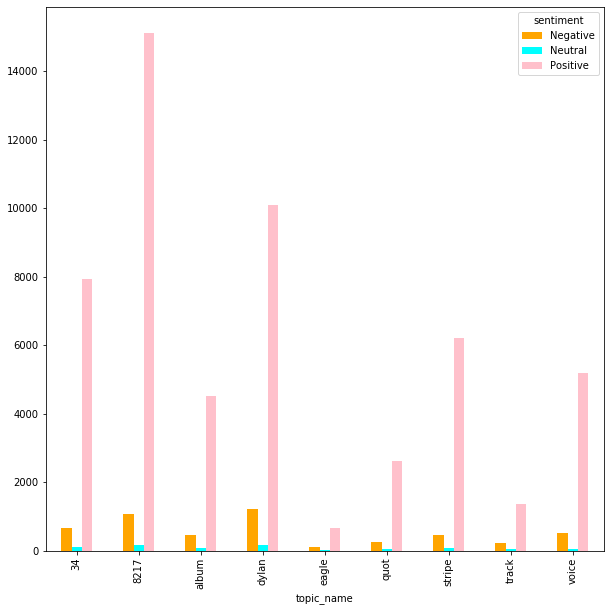

In [76]:
fig = graph_results.plot.bar(rot=90, figsize=(10,10), color=['orange', 'aqua', 'pink'])
fig.figure.savefig('sentiment_analysis.png')

In [86]:

#Woah, this product has had a LOT of positive reviews. It must be stellar!
